In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns

import matplotlib.pyplot as plt

from scipy.stats import skew
from scipy.stats.stats import pearsonr
from math import sqrt

from sklearn.metrics import mean_squared_error

In [2]:
holidays = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
transactions = pd.read_csv('transactions.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test1 = pd.read_csv('test.csv')

In [3]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
train.shape

(3000888, 6)

In [5]:
train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [6]:
m1=pd.merge(holidays,oil)
m2=pd.merge(train,stores)
m3=pd.merge(m2,transactions)

df=pd.merge(m3,m1,on="date")

In [7]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73063,2013-02-11,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73064,2013-02-11,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73065,2013-02-11,1,BEVERAGES,172.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73066,2013-02-11,1,BOOKS,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


In [8]:
df.describe()

,id,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico
count,3.220470e+05,322047.000000,322047.000000,322047.000000,322047.000000,322047.000000,300003.000000
mean,1.682979e+06,26.994672,406.383452,3.727136,8.531202,1734.117840,64.077912
std,7.862493e+05,15.595174,1246.881240,15.512095,4.713809,1050.335018,25.147682
min,5.610000e+02,1.000000,0.000000,0.000000,1.000000,54.000000,27.960000
25%,1.010616e+06,13.000000,1.000000,0.000000,4.000000,1030.000000,44.660000
50%,1.842406e+06,27.000000,19.000000,0.000000,9.000000,1409.000000,51.440000
75%,2.209556e+06,40.000000,241.260505,1.000000,13.000000,2148.000000,94.740000
max,3.000887e+06,54.000000,124717.000000,716.000000,17.000000,8359.000000,107.950000


In [9]:
#Replacing missing fields with daily oil prices
df.loc[(df.dcoilwtico.isnull()),'dcoilwtico']=df.dcoilwtico.mean()
#checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            322047 non-null  int64  
 1   date          322047 non-null  object 
 2   store_nbr     322047 non-null  int64  
 3   family        322047 non-null  object 
 4   sales         322047 non-null  float64
 5   onpromotion   322047 non-null  int64  
 6   city          322047 non-null  object 
 7   state         322047 non-null  object 
 8   type_x        322047 non-null  object 
 9   cluster       322047 non-null  int64  
 10  transactions  322047 non-null  int64  
 11  type_y        322047 non-null  object 
 12  locale        322047 non-null  object 
 13  locale_name   322047 non-null  object 
 14  description   322047 non-null  object 
 15  transferred   322047 non-null  bool   
 16  dcoilwtico    322047 non-null  float64
dtypes: bool(1), float64(2), int64(5), object(9)
memo

Therefore, no null values are present.

In [10]:
#Converting the date column from string to datetime dtype.
from datetime import datetime

df['new_date']=pd.to_datetime(df['date'],format='%Y-%m-%d',errors='coerce')

<AxesSubplot:xlabel='new_date', ylabel='sales'>

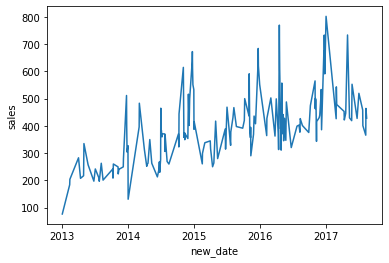

In [11]:
#Time Series plot of the sales data
sns.lineplot(x='new_date',y='sales',data=df,ci=None,estimator='mean')

The plot shows that there is an increasing trend of sales with each year. Irregularities and fluctuations are also observed. From 2013 to 2017, the sales have increased, thus showing an upward trend.

Next, we will try to analyse the monthwise sales to find out which months on an average have contributed to high sales. This can be done by splitting the 'date' column into year, month and day columns.

In [12]:
df[["year", "month", "day"]] = df["date"].str.split("-", expand = True)


df['month'].replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],inplace=True)
df['month'] = pd.Categorical(df['month'],
                                   categories=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],
                                   ordered=True)
df['day'] = pd.Categorical(df['day'],categories=['01','02','03','04','05','06','07','08','09','10','11', '12', '14','15','16','17','18','19','20','21','22','23', '24', '25', '26', '27','28','29','30','31'],ordered=True)

<AxesSubplot:xlabel='month', ylabel='sales'>

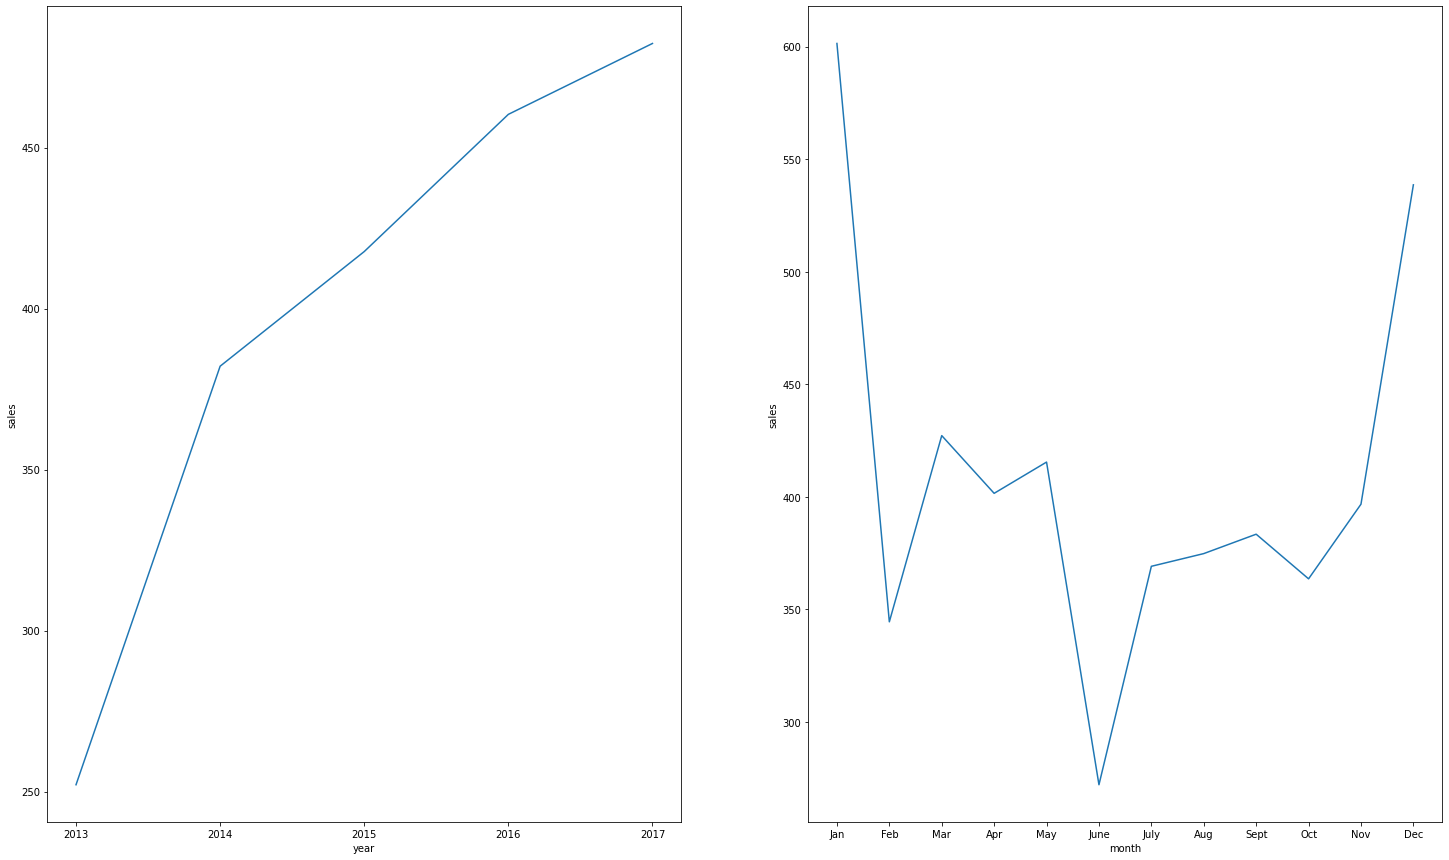

In [13]:
#plotting the monthwise sales trend
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.lineplot(x='year',y='sales',data=df,ci=None,estimator='mean',ax=ax[0])
sns.lineplot(x='month',y='sales',data=df,ci=None,estimator='mean',ax=ax[1])

Highest sales in the month of January with sharp dips in February and June (minimum average sales) and again increased in December.

In [14]:
df['family'].nunique()

33

 33 unique categories in family which can be re-classified into groups as follows.

In [15]:
df['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools', inplace = True)
df['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR','PERSONAL CARE','CELEBRATION','MAGAZINES','BOOKS', 'BABY CARE'], 'LifeStyle', inplace = True)
df['family'].replace(['HOME APPLIANCES','HOME AND KITCHEN I', 'HOME AND KITCHEN II','HOME CARE','SCHOOL AND OFFICE SUPPLIES'], 'Home', inplace=True)
df['family'].replace([ 'GROCERY II', 'PET SUPPLIES','SEAFOOD','LIQUOR,WINE,BEER'], 'Food', inplace=True)
df['family'].replace(['DELI', 'EGGS'], 'Daily', inplace=True)

In [16]:
#Preparing the train and test datasets which would be used for prediction later

train['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools', inplace = True)
train['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR','PERSONAL CARE','CELEBRATION','MAGAZINES','BOOKS', 'BABY CARE'], 'LifeStyle', inplace = True)
train['family'].replace(['HOME APPLIANCES','HOME AND KITCHEN I', 'HOME AND KITCHEN II','HOME CARE','SCHOOL AND OFFICE SUPPLIES'], 'Home', inplace=True)
train['family'].replace([ 'GROCERY II', 'PET SUPPLIES','SEAFOOD','LIQUOR,WINE,BEER'], 'Food', inplace=True)
train['family'].replace(['DELI', 'EGGS'], 'Daily', inplace=True)

test['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools', inplace = True)
test['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR','PERSONAL CARE','CELEBRATION','MAGAZINES','BOOKS', 'BABY CARE'], 'LifeStyle', inplace = True)
test['family'].replace(['HOME APPLIANCES','HOME AND KITCHEN I', 'HOME AND KITCHEN II','HOME CARE','SCHOOL AND OFFICE SUPPLIES'], 'Home', inplace=True)
test['family'].replace([ 'GROCERY II', 'PET SUPPLIES','SEAFOOD','LIQUOR,WINE,BEER'], 'Food', inplace=True)
test['family'].replace(['DELI', 'EGGS'], 'Daily', inplace=True)

<AxesSubplot:xlabel='sales', ylabel='family'>

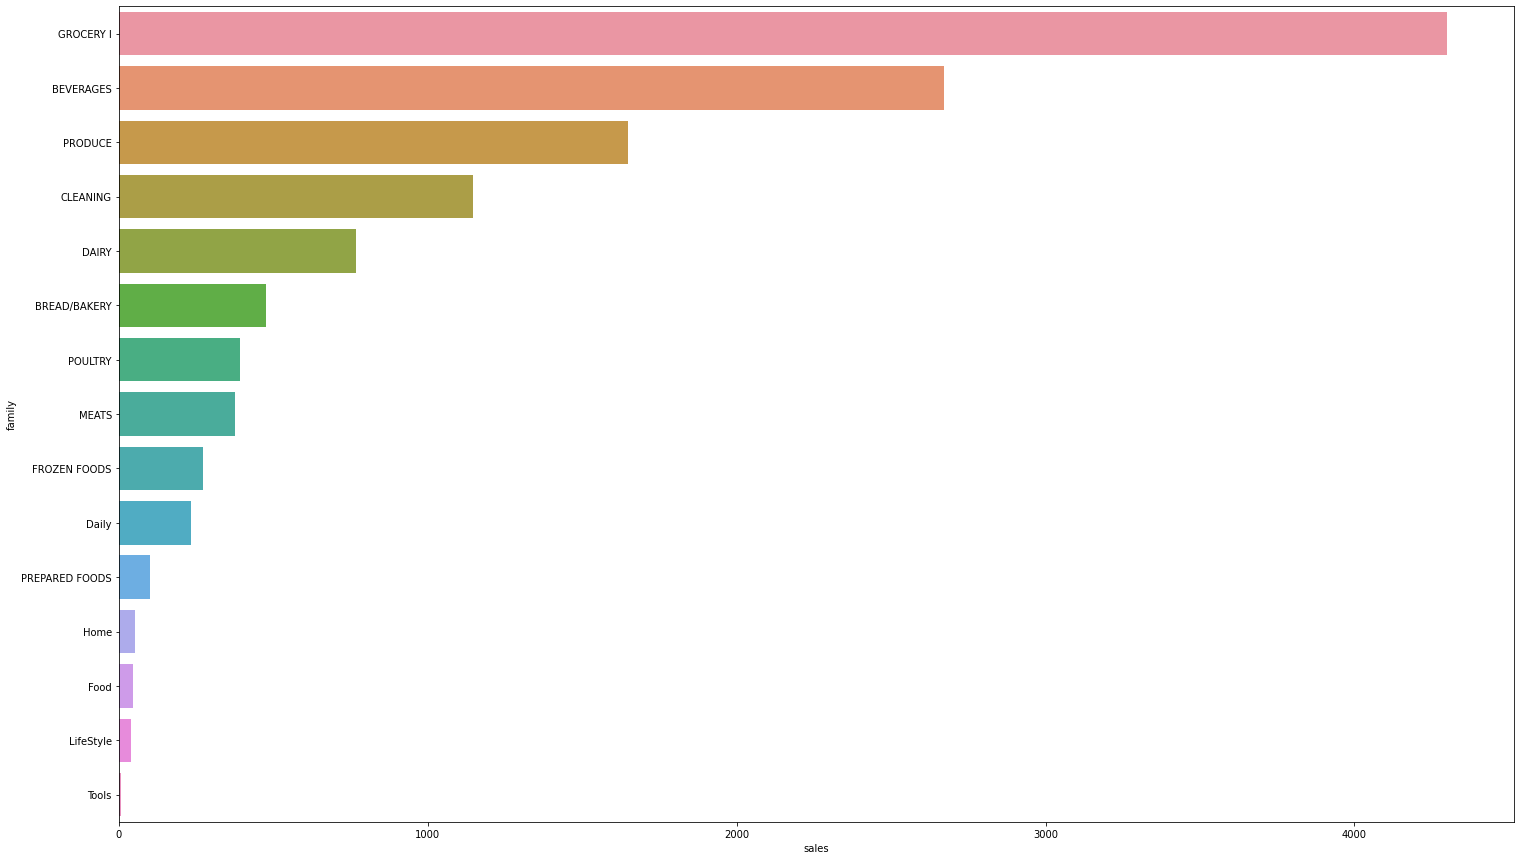

In [17]:
#Plotting the sales using bar-plot w.r.t to 'family' categories.

d=df.groupby('family')['sales'].mean().sort_values(ascending=False)
d=pd.DataFrame(d)
df.sales= pd.to_numeric(df.sales, errors='coerce')
ax,f=plt.subplots(figsize=(25,15))
sns.barplot(x='sales',y=d.index,data=d,ax=None,ci=None)

Maximum sales are there for 'Grocery I' followed by 'Beverages', ;Produce', 'Cleaning' , etc. The minimum is in case of 'Tools'.

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

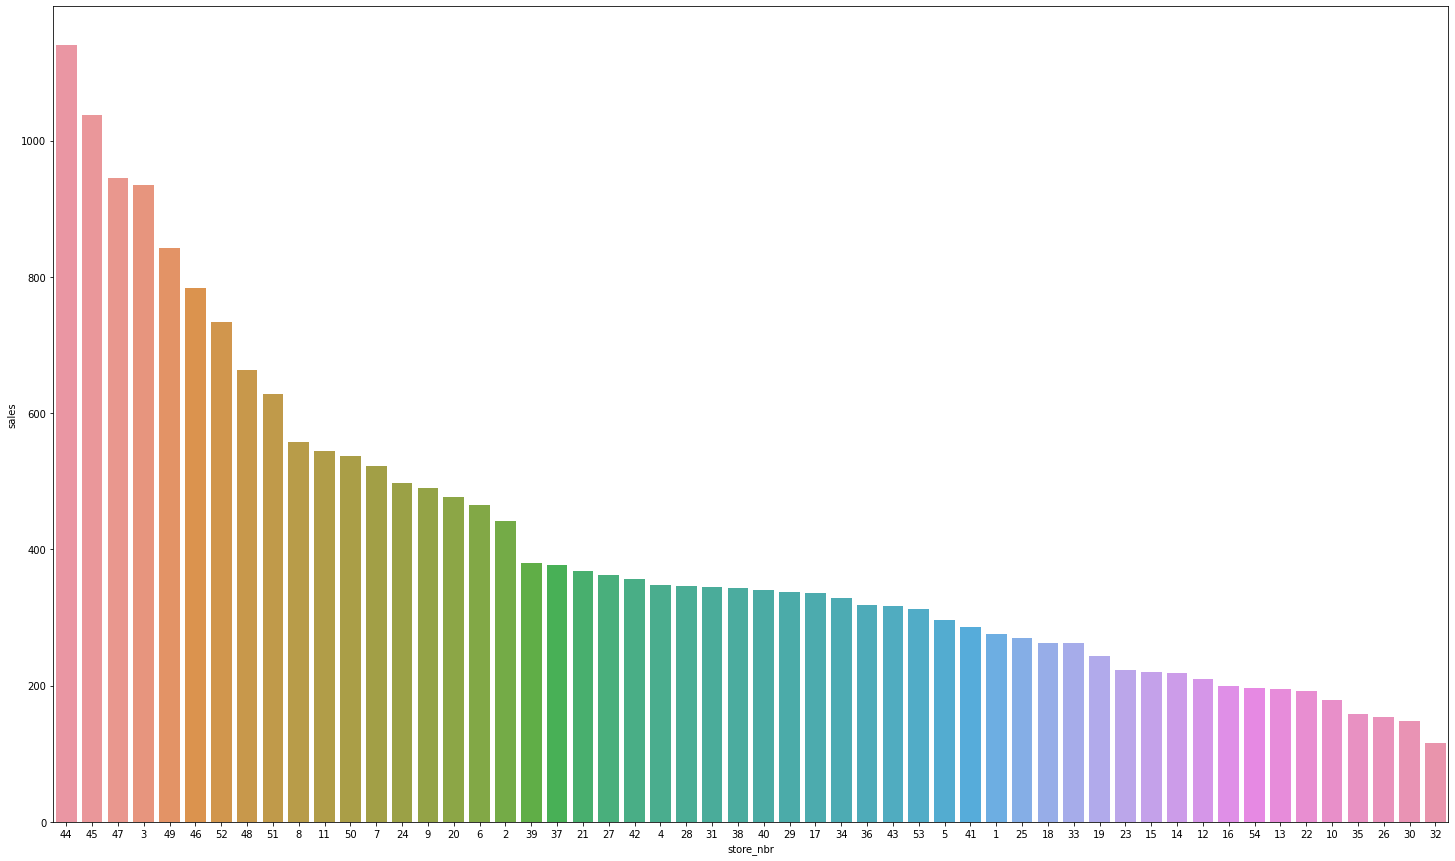

In [18]:
#Plot of sales w.r.t store number

s=df.groupby('store_nbr')['sales'].mean().sort_values(ascending=False)
s=pd.DataFrame(s)
ax,f=plt.subplots(figsize=(25,15))
sns.barplot(x=s.index,y='sales',data=s,ax=None,ci=None,order=s.index)

Highest sales are for store numbers 44,45,47,etc. and lowest are for 30,32,etc

<AxesSubplot:xlabel='sales', ylabel='city_state'>

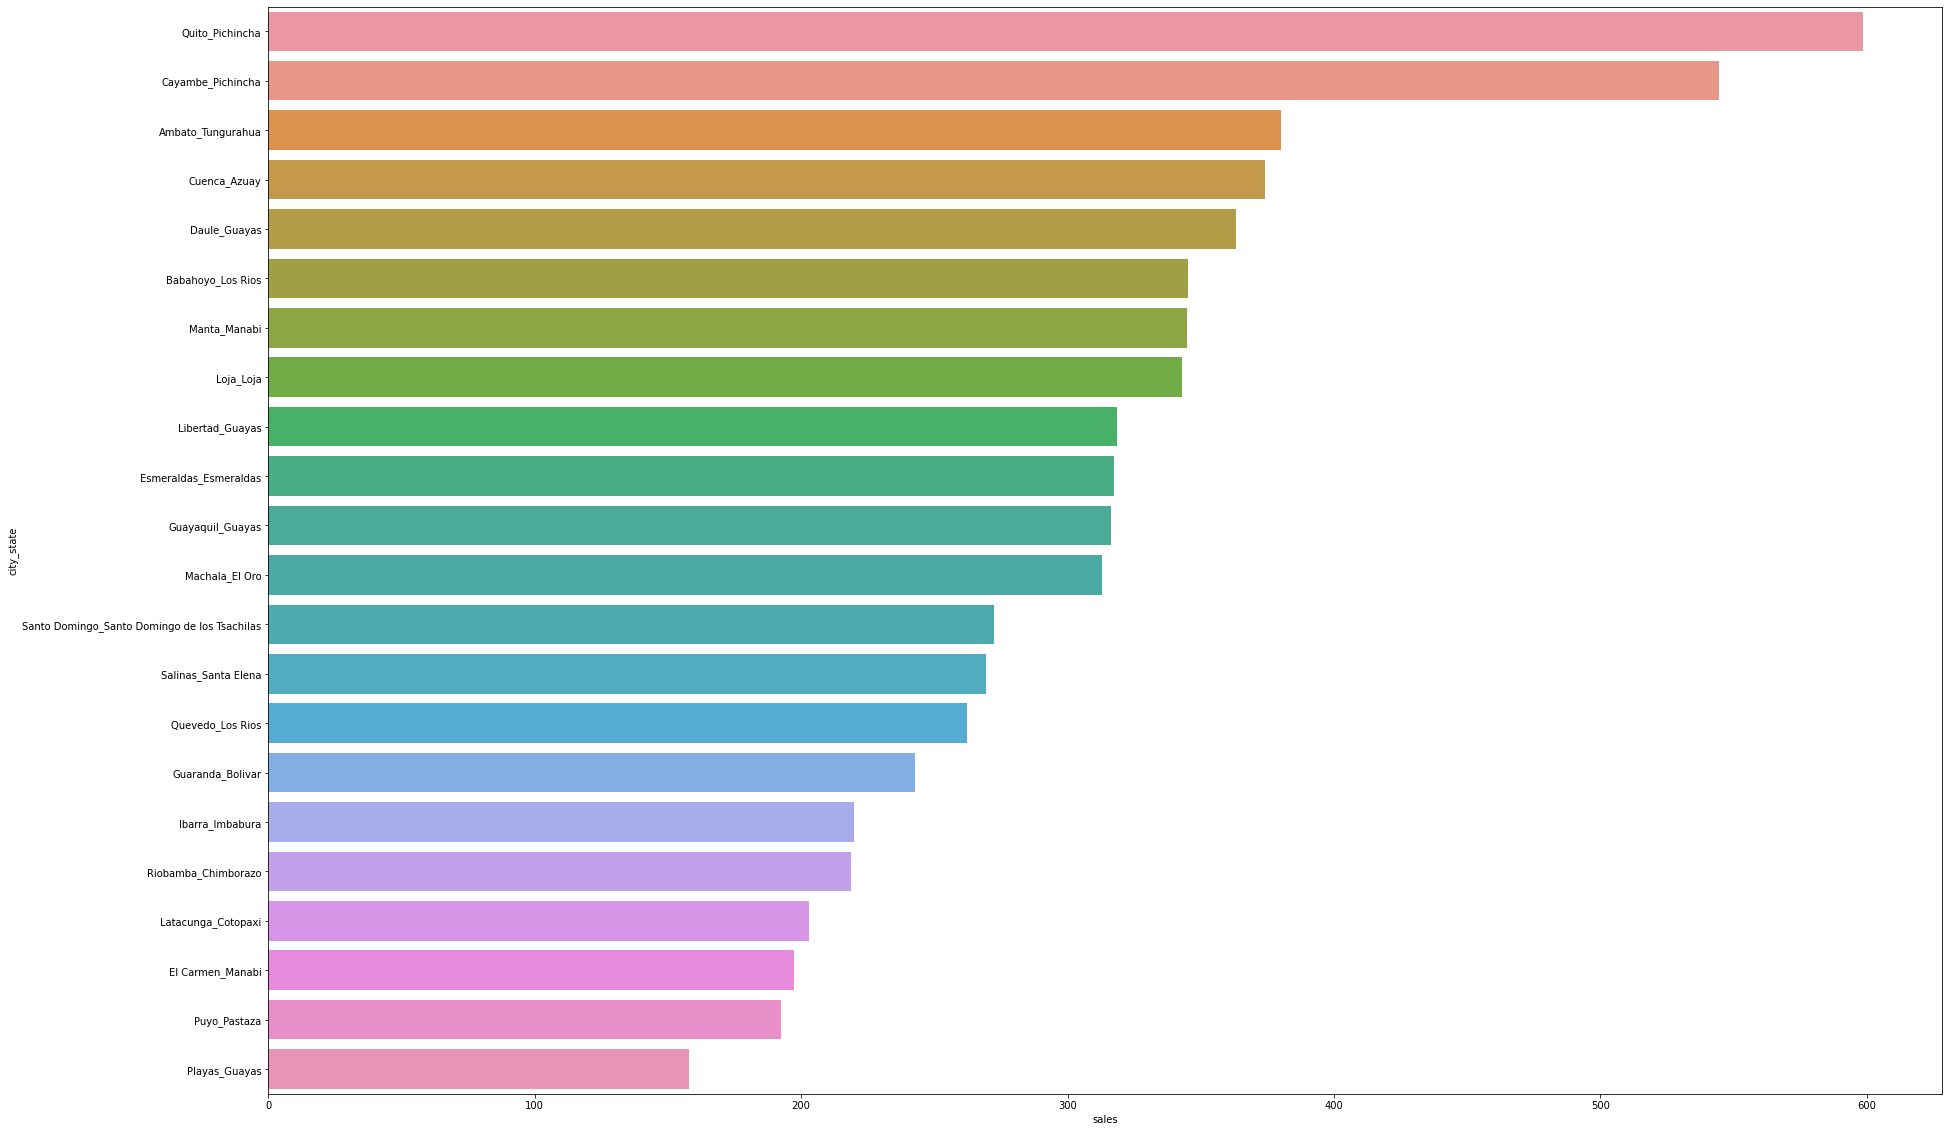

In [19]:
#For that,we will make new columns

df['city_state']=df['city']+"_"+df['state']
df['type_locale']=df['type_y']+"_"+"locale"

city_state=df[(df['store_nbr']==44)|(df['store_nbr']==45)|(df['store_nbr']==47)|(df['store_nbr']==30)|(df['store_nbr']==32)][['city_state','store_nbr']]
city_state.value_counts()
c=df.groupby(['city_state'])['sales'].mean().sort_values(ascending=False)
c=pd.DataFrame(c)
ax,f=plt.subplots(figsize=(30,20))
sns.barplot(x='sales',y=c.index,data=c,ax=None,ci=None)

EDA & Sales Prediction using Xgboost

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'sales'], train['sales'], test_size=0.33, random_state=42)

In [21]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# one-hot encode the categorical features
cat_attribs = ['id','date','family']
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)], remainder='passthrough')

encoder = full_pipeline.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
test=encoder.transform(test)
# train the model
model = XGBRegressor(n_estimators=10, max_depth=20, verbosity=2)
model.fit(X_train, y_train)

# extract the training set predictions
model.predict(X_train)
# array([7.0887003, 3.7923286, 7.0887003], dtype=float32)

# extract the test set predictions
model.predict(X_test)
# array([7.0887003, 7.0887003], dtype=float32)

[17:30:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 15966 extra nodes, 0 pruned nodes, max_depth=20
[17:30:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 18730 extra nodes, 0 pruned nodes, max_depth=20
[17:31:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 18270 extra nodes, 0 pruned nodes, max_depth=20
[17:31:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 15756 extra nodes, 0 pruned nodes, max_depth=20
[17:31:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 12904 extra nodes, 0 pruned nodes, max_depth=20
[17:31:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end

array([2.5322014e+03, 1.3707391e+00, 1.8087810e+02, ..., 1.6774099e+01,
       2.0964148e+01, 2.4844824e+02], dtype=float32)

In [22]:
model.score(X_test, y_test) #accuracy
""" Accuracy_score is for classification tasks only. For regression you should use something different,
where X_test is sample, y_test is corresponding ground truth values. It will compute predictions inside
R-squared can be computed by calling score function """

0.8450846653504303

In [23]:
pred1=model.predict(test)
pred=pd.DataFrame(pred1)


pred.rename(columns={0:'sales'},inplace=True)
pred.index=test1['id']
pred

,sales
id,
3000888,6.612665
3000889,16.414921
3000890,134.848709
3000891,2128.404541
3000892,16.414921
...,...
3029395,488.521637
3029396,69.998688
3029397,1403.536133


 Quito_Pichincha has reported the highest sales